In [1]:
import numpy as np
training_inputs=np.array([[0,1,1],
                          [1,1,1],
                          [1,0,1],
                          [0,1,1]])
training_outputs=np.array([[0,1,1,0]]).T

In [2]:
print(training_outputs)

[[0]
 [1]
 [1]
 [0]]


In [3]:
print(training_outputs.shape)

(4, 1)


In [4]:
#create 3 random weight because we  have 3 features
weights=np.random.random((3,1))
weights


array([[0.76210371],
       [0.23436606],
       [0.62204253]])

In [5]:
#these value comes randomly whenever we run this value wikkk be change so put seed()
np.random.seed(2)
weights=np.random.random((3,1))
weights

array([[0.4359949 ],
       [0.02592623],
       [0.54966248]])

In [6]:
#multiply weight and training_inputs
outputs=np.dot(training_inputs,weights)
outputs

array([[0.57558871],
       [1.01158361],
       [0.98565738],
       [0.57558871]])

In [7]:
def sigmoid(X):
    return 1/(1+np.exp(-X))

In [8]:
#apply activation function sigmoid
final_outputs=sigmoid(outputs)
print(final_outputs)

[[0.64005174]
 [0.73332995]
 [0.72822932]
 [0.64005174]]


# deep learning problem using kears and tensorflow

In [9]:
import keras

Using TensorFlow backend.


In [10]:
import tensorflow

# diabetez prediction using ANN(keras)

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
col_names=["pregnant","glucose","bp","skin","insulin","bmi","pdegree","age","result"]
pima=pd.read_csv("D:/DATA SCIENCE NOTE/pima.csv",names=col_names)
pima.head(5)

,pregnant,glucose,bp,skin,insulin,bmi,pdegree,age,result
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
#display the no of people diabets and without diabetes
N,Y=pima["result"].value_counts()
print("no of people who has no suffer from diabetic dieases",N)
print("no of people who has with suffer from diabetic dieases",Y)

no of people who has no suffer from diabetic dieases 500
no of people who has with suffer from diabetic dieases 268


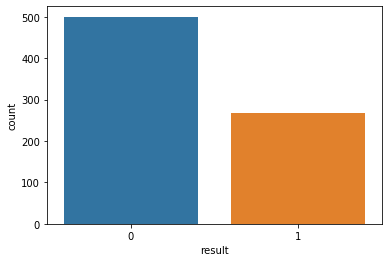

In [13]:
#data visualization with countplot
import seaborn as sns
sns.countplot(pima["result"])

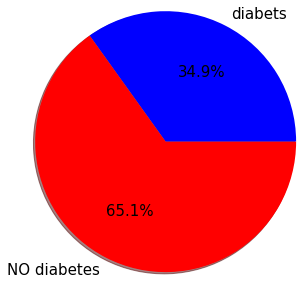

In [14]:
%matplotlib inline
font={"fontsize":15}
data=[Y,N]
plt.pie(data,labels=["diabets","NO diabetes"],colors=["blue","red"],autopct="%0.1f%%",shadow=True,radius=1.5,textprops=font)
plt.show()

In [15]:
#find the misiing values
pima.isnull().sum()

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pdegree     0
age         0
result      0
dtype: int64

In [16]:
#handle the missing values
print("no of rows with zero glucose",len(pima.loc[pima['glucose']==0]))
print("no of rows with zero pregnant",len(pima.loc[pima["pregnant"]==0]))
print("no of rows with zero bp",len(pima.loc[pima["bp"]==0]))
print("no of rows with zero skin",len(pima.loc[pima["skin"]==0]))
print("no of rows with zero insulin",len(pima.loc[pima["insulin"]==0]))
print("no of rows with zero bmi",len(pima.loc[pima["bmi"]==0]))
print("no of rows with zero pdegree",len(pima.loc[pima["pdegree"]==0]))
print("no of rows with zero age",len(pima.loc[pima["age"]==0]))

no of rows with zero glucose 5
no of rows with zero pregnant 111
no of rows with zero bp 35
no of rows with zero skin 227
no of rows with zero insulin 374
no of rows with zero bmi 11
no of rows with zero pdegree 0
no of rows with zero age 0


In [17]:
#calculate the median value for bmi ,pdegree,insulin,skin,bp,pregnant,glucose
median_bmi=pima["bmi"].median()

In [18]:
#substitute the bmi column of the dataset where are 0 value arer present
pima["bmi"]=pima["bmi"].replace(to_replace=0,value=median_bmi)
pima["insulin"]=pima["insulin"].replace(to_replace=0,value=pima["insulin"].median())
pima["skin"]=pima["skin"].replace(to_replace=0,value=pima["skin"].median())
pima["bp"]=pima["bp"].replace(to_replace=0,value=pima["bp"].median())
pima["pregnant"]=pima["pregnant"].replace(to_replace=0,value=pima["pregnant"].median())
pima["glucose"]=pima["glucose"].replace(to_replace=0,value=pima["glucose"].median())

In [20]:
#separate the input and output value
X=pima.drop(columns=["result"])
Y=pima["result"]
X


,pregnant,glucose,bp,skin,insulin,bmi,pdegree,age
0,6,148,72,35,30.5,33.6,0.627,50
1,1,85,66,29,30.5,26.6,0.351,31
2,8,183,64,23,30.5,23.3,0.672,32
3,1,89,66,23,94.0,28.1,0.167,21
4,3,137,40,35,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63
764,2,122,70,27,30.5,36.8,0.340,27
765,5,121,72,23,112.0,26.2,0.245,30
766,1,126,60,23,30.5,30.1,0.349,47


In [21]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: result, Length: 768, dtype: int64

In [25]:
#standardise  or normalize the data by keeping in between si that min will be 0 and std deviatiobn 1
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

print(X)

[[ 0.57007018  0.86604475 -0.03198993 ...  0.16724016  0.46849198
   1.4259954 ]
 [-1.08580689 -1.20506583 -0.5283186  ... -0.85155088 -0.36506078
  -0.19067191]
 [ 1.23242101  2.01666174 -0.69376149 ... -1.33183808  0.60439732
  -0.10558415]
 ...
 [ 0.23889477 -0.02157407 -0.03198993 ... -0.90976751 -0.68519336
  -0.27575966]
 [-1.08580689  0.14279979 -1.02464727 ... -0.34215536 -0.37110101
   1.17073215]
 [-1.08580689 -0.94206766 -0.19743282 ... -0.29849289 -0.47378505
  -0.87137393]]


In [26]:
#split the dataset into training and testing the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [27]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [39]:
import keras
from keras.models import Sequential
from keras.layers import Dense
model=Sequential()
#now add the input and first hidden layer
#we have 8 inputs and let keedp 5 neurons in first hidden layers
model.add(Dense(units=5,input_dim=8,activation="relu"))


In [40]:
#add second hidden leyer
#lets say it contain 5 neurons 
model.add(Dense(units=5,activation="relu"))

In [41]:
#add output layer
#here the outputs is a binary i.e 0 and 1.hece in this  place we use sigmoid
#activation function and it contain one neuron
model.add(Dense(units=1,activation="sigmoid"))

In [43]:
#compile the keras moodel
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [44]:
#fit keras model
model.fit(X_train,Y_train,epochs=150,batch_size=10)

Epoch 1/150
614/614 [==============================] - 1s 1ms/step - loss: 0.6428 - accuracy: 0.6450
Epoch 2/150
614/614 [==============================] - 0s 150us/step - loss: 0.6104 - accuracy: 0.6775
Epoch 3/150
614/614 [==============================] - 0s 148us/step - loss: 0.5870 - accuracy: 0.6775
Epoch 4/150
614/614 [==============================] - 0s 141us/step - loss: 0.5680 - accuracy: 0.6808
Epoch 5/150
614/614 [==============================] - 0s 146us/step - loss: 0.5532 - accuracy: 0.6938
Epoch 6/150
614/614 [==============================] - 0s 153us/step - loss: 0.5396 - accuracy: 0.7068
Epoch 7/150
614/614 [==============================] - 0s 142us/step - loss: 0.5272 - accuracy: 0.7199
Epoch 8/150
614/614 [==============================] - 0s 146us/step - loss: 0.5159 - accuracy: 0.7199
Epoch 9/150
614/614 [==============================] - 0s 156us/step - loss: 0.5063 - accuracy: 0.7345
Epoch 10/150
614/614 [==============================] - 0s 146us/step - los

In [45]:
#predict for X_test
Y_pred=model.predict(X_test)
Y_pred

array([[1.25986319e-02],
       [4.57071632e-01],
       [1.81395039e-01],
       [3.57771933e-04],
       [7.78704882e-02],
       [5.76544832e-03],
       [1.56398639e-01],
       [1.70190297e-02],
       [4.35736567e-01],
       [4.85969424e-01],
       [7.58798718e-01],
       [5.11833318e-02],
       [7.52782643e-01],
       [2.48593897e-01],
       [8.59115243e-01],
       [2.06108596e-02],
       [8.05945694e-02],
       [3.99444371e-01],
       [4.74362224e-02],
       [2.40966137e-02],
       [4.95454520e-02],
       [1.03050828e-01],
       [5.59611738e-01],
       [9.30459797e-01],
       [6.05330765e-02],
       [1.97150096e-01],
       [1.07508533e-01],
       [9.64854881e-02],
       [3.02290410e-01],
       [6.58083260e-01],
       [6.14801824e-01],
       [8.30952108e-01],
       [9.08150434e-01],
       [3.14401761e-02],
       [1.95666123e-02],
       [7.96990275e-01],
       [7.44662106e-01],
       [1.88313797e-02],
       [5.59611738e-01],
       [1.12623665e-02],


In [48]:
Y_test.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0],
      dtype=int64)

In [50]:
Y_pred=Y_pred>0.5
Y_pred

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [

In [51]:
Y_pred=model.predict_classes(X_test)
Y_pred

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
    

In [57]:
#find accuracy
from sklearn.metrics import accuracy_score
acc=accuracy_score(Y_test,Y_pred)
acc=round(acc*100,2)
print("accuracy of this model is",acc)

accuracy of this model is 72.08


In [60]:
#or evaluate the keras model
#evaluate() RETURNS 2 values loss and accuracy
__,acc=model.evaluate(X_test,Y_test)
print(acc)

154/154 [==============================] - 0s 495us/step
0.7207792401313782


In [62]:
#noe predict for an unknown person
import numpy as np
data=np.array([[8,48,72,45,0,35,0,65]])
X1=sc.transform(data)
X1

array([[ 8.00000000e+00,  4.80000000e+01,  7.20000000e+01,
         4.50000000e+01, -1.85037171e-17,  3.50000000e+01,
        -1.38777878e-17,  6.50000000e+01]])

In [63]:
model.predict(X1)

array([[0.55961174]], dtype=float32)

In [64]:
model.predict_classes(X1)

array([[1]])

In [ ]:
#this is expalin about deep learning using an exapmle of diabetic prediction